# 2. Stacked LSTM

----------

In [33]:
from math import sin
from math import pi
from math import exp
from random import random
from random import randint
from random import uniform
from numpy import array
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

##### Sample sequence

In [34]:
length = 100
freq = 5
sequence = [sin(2 * pi * freq * (i/length)) for i in range(length)]

* Plot sequence

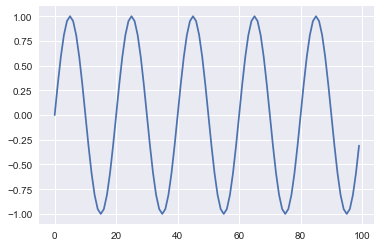

In [35]:
pyplot.plot(sequence)
pyplot.show()

* With Damping

In [36]:
length = 100
period = 10
decay = 0.05
sequence = [0.5 + 0.5 * sin(2 * pi * i / period) \
            * exp(-decay * i) for i in range(length)]

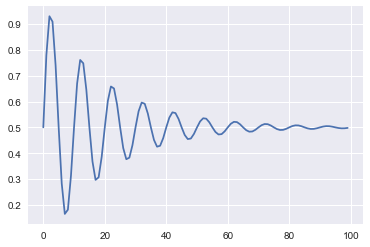

In [37]:
pyplot.plot(sequence)
pyplot.show()

#### Sequence Generator

* Generate damped sine wave in [0,1]

In [38]:
def generate_sequence(length, period, decay):
    return [0.5 + 0.5 * sin(2 * pi * i / period) *\
           exp(-decay * i) for i in range(length)]

* Generate input and output pairs of damped sine waves

In [39]:
def generate_examples(length, n_patterns, output):
  X, y = list(), list()
  for _ in range(n_patterns):
    p = randint(10, 20)
    d = uniform(0.01, 0.1)
    sequence = generate_sequence(length + output, p, d)
    X.append(sequence[:-output])
    y.append(sequence[-output:])
  X = array(X).reshape(n_patterns, length, 1)
  y = array(y).reshape(n_patterns, output)
  return X, y

* test problem generation

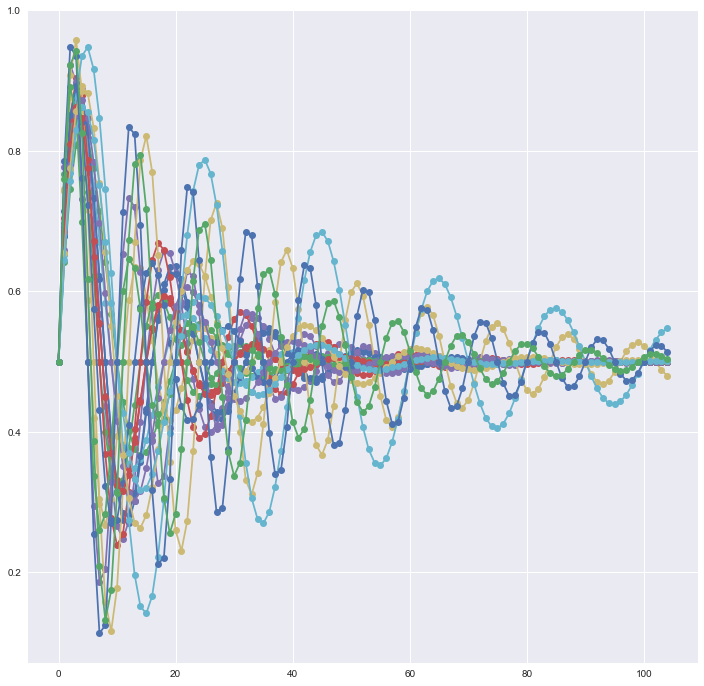

In [40]:
plt.figure(figsize =(12,12))
X, y = generate_examples(100, 20, 5)
for i in range(len(X)):
    pyplot.plot([x for x in X[i, :, 0]] + [x for x in y[i]], '-o') 
pyplot.show()   

##  Model

In [9]:
# Example of one output for whole sequence
from keras.models import Sequential
from keras.layers import LSTM,Dense

In [42]:
# configure problem
length = 50
output = 5


# define model
model = Sequential()
model.add(LSTM(20, return_sequences=True, input_shape=(length, 1))) 
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(20, return_sequences=True))
model.add(LSTM(20))
model.add(Dense(output))


# compile
model.compile(loss='mae',
              optimizer='adam')


print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_13 (LSTM)               (None, 50, 20)            1760      
_________________________________________________________________
lstm_14 (LSTM)               (None, 50, 20)            3280      
_________________________________________________________________
lstm_15 (LSTM)               (None, 50, 20)            3280      
_________________________________________________________________
lstm_16 (LSTM)               (None, 20)                3280      
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 105       
Total params: 11,705
Trainable params: 11,705
Non-trainable params: 0
_________________________________________________________________
None


##### Fit the model

In [49]:
X, y = generate_examples(length, 500, output)
model.fit(X, y, batch_size=10, epochs=5, verbose = 2)

Epoch 1/5
20s - loss: 0.0586
Epoch 2/5
20s - loss: 0.0413
Epoch 3/5
21s - loss: 0.0403
Epoch 4/5
20s - loss: 0.0400
Epoch 5/5
20s - loss: 0.0419


##### Evaluate the model

In [50]:
# evaluate model
X, y = generate_examples(length, 100, output) 
loss = model.evaluate(X, y, verbose=0) 
print('MAE: %f' % loss)

MAE: 0.050917


##### Prediction

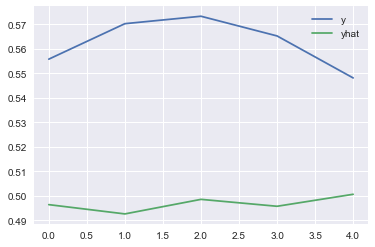

In [53]:
# prediction on new data
X, y = generate_examples(length, 20, output) 
yhat = model.predict(X, verbose=0) 
pyplot.plot(y[0], label='y') 
pyplot.plot(yhat[0], label='yhat') 
pyplot.legend()
pyplot.show()